Shape of the dataset (3179, 1086)
dataset variable types: Price                                       int32
Year_2010                                   int32
Year_2013                                   int32
Year_2018                                   int32
Year_2019                                   int32
                                           ...   
Sol Arka Çamurluk_çizik, ezik             float64
Sol Arka Çamurluk_çizik, ezik, hasarlı    float64
Sol Arka Çamurluk_çizik, hasarlı          float64
Mortgage                                  float64
Confiscation                              float64
Length: 1086, dtype: object
first 10 rows of the dataset
     Price  Year_2010  Year_2013  Year_2018  Year_2019  Year_2020  Year_2021  \
0  1278000          0          0          0          0          0          0   
1  1274000          0          0          0          0          0          0   
2  1687000          0          0          0          0          0          0   
3  1460000     

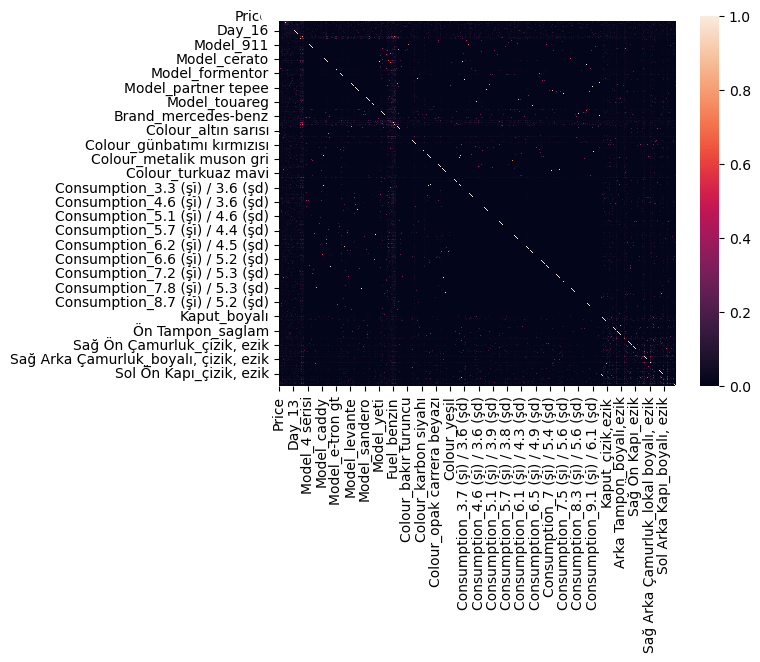

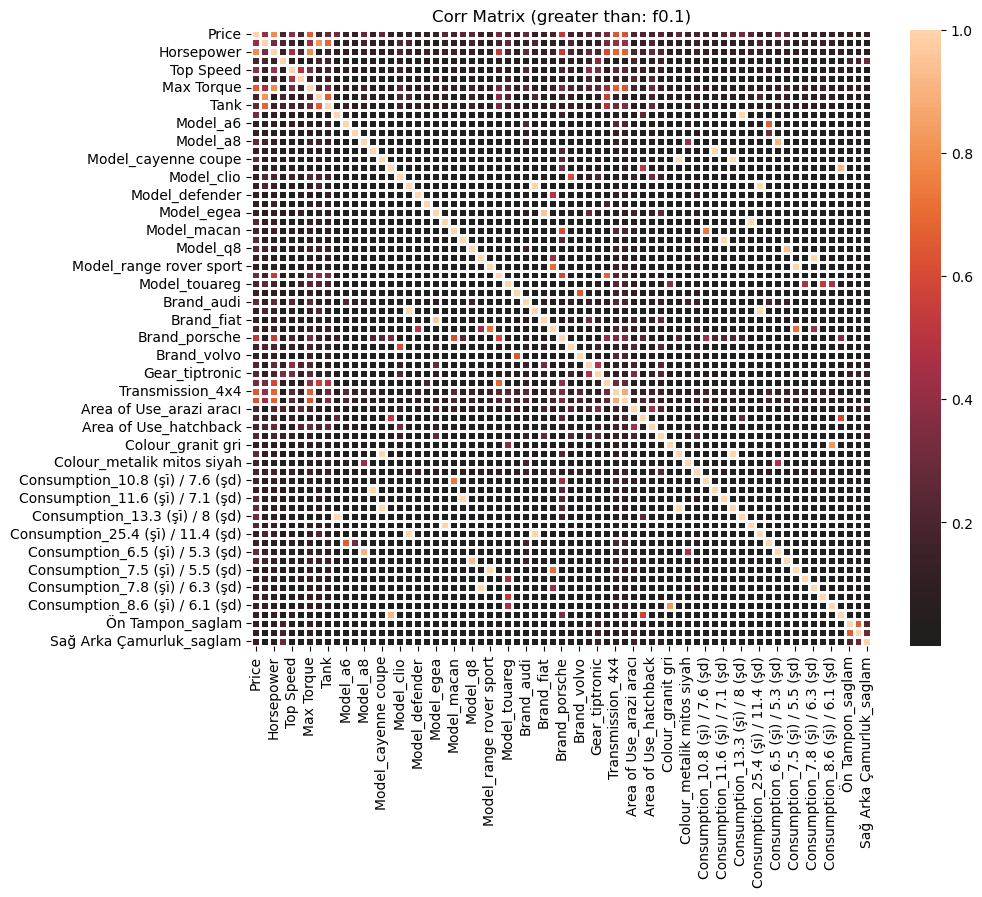





Linear Regression R^2 Score: -2.1485147475226945e+26
Linear Regression Time: 3.78226375579834
Decision Tree R^2 Score: 0.7006685753743873
Decision Tree Time: 0.23241329193115234
Random Forest R^2 Score: 0.8428103907096021
Random Forest Time: 8.299424886703491
Gradient Boosting R^2 Score: 0.8846242324930639
Gradient Boosting Time: 5.899734973907471
Extra Trees R^2 Score: 0.874964519271176
Extra Trees Time: 13.487843751907349
The Best Model: Gradient Boosting
R^2 Score of the Best Model: 0.8846242324930639






Linear Regression CV - r2score :  -398504313243432672141770752.0000000000000000
Linear Regression test-r2score :  -214851474752269450777460736.0000000000000000
Linear Regression: 34.40537762641907 saniye

Decision Tree CV - r2score :  0.8618463535074344
Decision Tree test-r2score :  0.7381444383905144
Decision Tree: 1.426412582397461 saniye

Random Forest CV - r2score :  0.8898921391252699
Random Forest test-r2score :  0.7901614555531635
Random Forest: 68.02465152740479 saniy

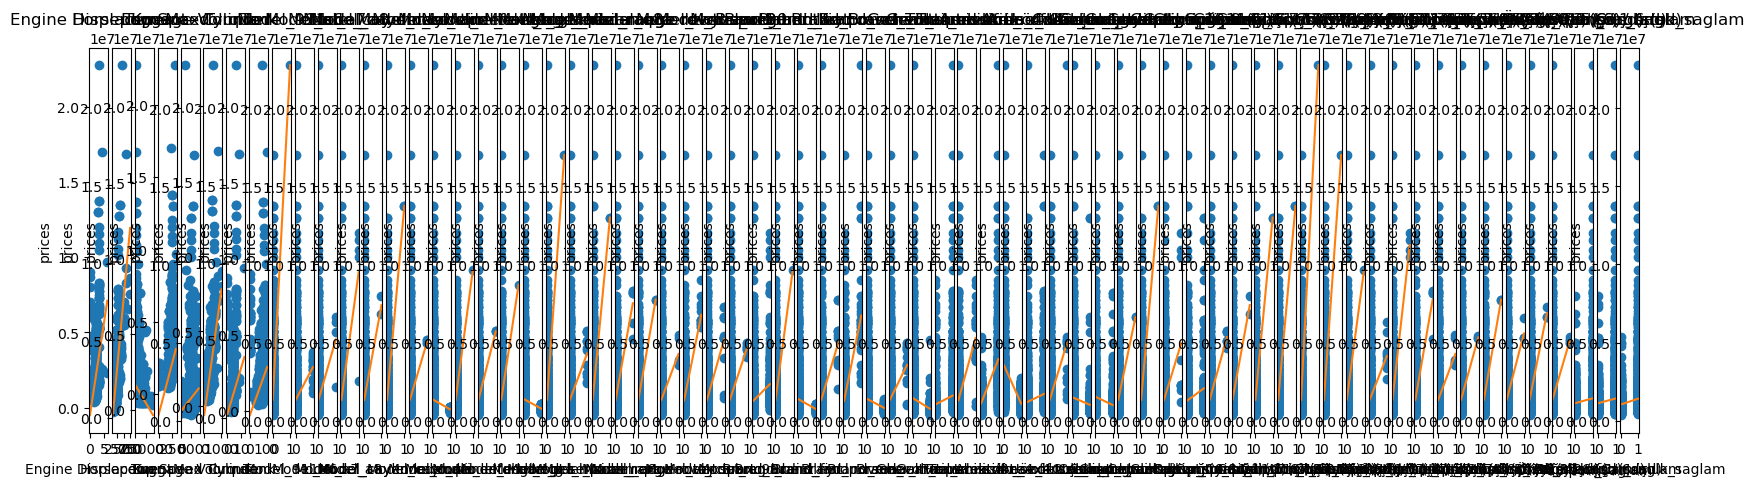

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 21 20:33:01 2024

@author: İrem Beyza Gül
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

data = pd.read_excel("sh_car_price.xlsx")


imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

data_filled = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

filtered_data = data_filled.loc[:, (data_filled != 0).any(axis=0)]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


columns_to_encode = ["Model", "Brand", "Gear", "Fuel", "Transmission", "Area of Use", "Colour", "Consumption", "Kaput", "Tavan", "Ön Tampon", "Arka Tampon", "Sağ Ön Çamurluk", "Sağ Ön Kapı", "Sağ Arka Kapı", "Sağ Arka Çamurluk", "Sol Ön Çamurluk", "Sol Ön Kapı", "Sol Arka Kapı", "Sol Arka Çamurluk"]

def apply_one_hot_encoding(data, columns):
    encoded_data = data.copy()
    for column in columns:
        
        encoded_data[column] = encoded_data[column].astype(str)
        
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(encoded_data[column])
        
        ohe = OneHotEncoder()
        column_onehot = ohe.fit_transform(encoded_data[column].values.reshape(-1, 1)).toarray()
       
        column_names = [column + '_' + str(label) for label in le.classes_]
        
        encoded_data = pd.concat([encoded_data, pd.DataFrame(column_onehot, columns=column_names)], axis=1)
        
        encoded_data.drop(columns=[column], inplace=True)
    return encoded_data


encoded_data = apply_one_hot_encoding(filtered_data, columns_to_encode)
encoded_data.drop(columns=["Mortgage", "Confiscation"], inplace=True)

from sklearn.preprocessing import LabelEncoder


columns_to_encode = ["Mortgage", "Confiscation"]
data_to_encode = filtered_data[columns_to_encode]


le = LabelEncoder()

for column in columns_to_encode:
   data_to_encode.loc[:, column] = le.fit_transform(data_to_encode[column])
    

veri_seti = pd.concat([encoded_data, data_to_encode], axis=1)



veri_seti['Date of Currency'] = pd.to_datetime(veri_seti['Date of Currency'])


veri_seti['Year'] = veri_seti['Date of Currency'].dt.year
veri_seti['Month'] = veri_seti['Date of Currency'].dt.month
veri_seti['Day'] = veri_seti['Date of Currency'].dt.day

veri_seti.drop('Date of Currency', axis=1, inplace=True)


veri_seti_onehot = pd.get_dummies(veri_seti[['Year', 'Month', 'Day']], columns=['Year', 'Month', 'Day']).astype(int)


result = pd.concat([veri_seti_onehot, veri_seti.drop(['Year', 'Month', 'Day'], axis=1)], axis=1)

veri_seti['Inspection'] = pd.to_datetime(veri_seti['Inspection'])


veri_seti['Year'] = veri_seti['Inspection'].dt.year
veri_seti['Month'] = veri_seti['Inspection'].dt.month
veri_seti['Day'] = veri_seti['Inspection'].dt.day

veri_seti.drop('Inspection', axis=1, inplace=True)


veri_seti_onehot = pd.get_dummies(veri_seti[['Year', 'Month', 'Day']], columns=['Year', 'Month', 'Day']).astype(int)


result = pd.concat([veri_seti_onehot, veri_seti.drop(['Year', 'Month', 'Day'], axis=1)], axis=1)

precit_column = result.pop('Price')

result.insert(0, 'Price', precit_column)

result['Price'] = result['Price'].astype('int32')

object_columns = result.select_dtypes(include=['object']).columns


for col in object_columns:
    result[col] = result[col].astype('float64')


print("Shape of the dataset",result.shape)
print("dataset variable types:",result.dtypes)
print("first 10 rows of the dataset")
print(result.head(10))
print("statistical data of the dataset")
description=result.describe()
print(description)



print("Data set Variable variables are related to each other")
corr=np.abs(result.corr(method='pearson'))
plt.figure()
sns.heatmap(corr, annot = True)



selected_column_name = result.columns[0]


column_correlations = corr[selected_column_name]
threshold = 0.1
filtered_correlations = column_correlations[abs(column_correlations) >= threshold]
selected_columns = filtered_correlations.index

filtered_corr = corr.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.show()

new_df = result[selected_columns].copy()




features =new_df.drop(new_df.columns[0], axis=1)
predict = result.iloc[:,0]

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):

    plt.subplot(1, len(features.columns), i+1)
    x = new_df[col]
    y = predict
    plt.plot(x, y, 'o')

    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')
print("\n")
print("\n")

#REGRESYON
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = result.iloc[:,1:].values 
y = result.iloc[:,0].values 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47,shuffle=True)


sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
import time
from sklearn.model_selection import StratifiedKFold,cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Linear Regression

start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
lr_time = time.time() - start_time
print("Linear Regression R^2 Score:", r2_lr)
print("Linear Regression Time:", lr_time)

# Decision Tree
start_time = time.time()
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dtc = model.predict(X_test)
r2_dtc = r2_score(y_test, y_pred_dtc)
dtc_time = time.time() - start_time
print("Decision Tree R^2 Score:", r2_dtc)
print("Decision Tree Time:", dtc_time)

# Random Forest
start_time = time.time()
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)
r2_rfc = r2_score(y_test, y_pred_rfc)
rfc_time = time.time() - start_time
print("Random Forest R^2 Score:", r2_rfc)
print("Random Forest Time:", rfc_time)

# Gradient Boosting
start_time = time.time()
model = GradientBoostingRegressor(n_estimators = 100,max_depth = 3,min_samples_split = 2,min_samples_leaf = 1,max_features = None)
model.fit(X_train, y_train)
y_pred_gbr = model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
gbr_time = time.time() - start_time
print("Gradient Boosting R^2 Score:", r2_gbr)
print("Gradient Boosting Time:", gbr_time)

# Extra Trees
start_time = time.time()
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_pred_etr = model.predict(X_test)
r2_etr = r2_score(y_test, y_pred_etr)
etr_time = time.time() - start_time
print("Extra Trees R^2 Score:", r2_etr)
print("Extra Trees Time:", etr_time)

# En iyi modeli bulma
models = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dtc,
    "Random Forest": r2_rfc,
    "Gradient Boosting": r2_gbr,
    "Extra Trees": r2_etr
}

best_model = max(models, key=models.get)
best_r2_score = models[best_model]

print("The Best Model:", best_model)
print("R^2 Score of the Best Model:", best_r2_score)
print("\n")
print("\n")
print("\n")

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import time
import pickle
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

num_folds = 10
results = {}



start_time0 = time.time()
for name, model in models.items():
    start_time = time.time()
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=47)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    
    mean_r2score = cv_results.mean()
    
    model.fit(X_train, y_train)
    test_r2score = model.score(X_test, y_test)
    results[name] = test_r2score
    
    print(f"{name} CV - r2score :  {mean_r2score:.16f}")
    print(f"{name} test-r2score :  {test_r2score:.16f}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name.ljust(8)}: {elapsed_time} saniye\n")
    
end_time0 = time.time()
elapsed_time = end_time0 - start_time0
print(f"{elapsed_time} saniye")

print("\n")

best_model = max(results, key=results.get)
print("Best Model according to the test data: ", best_model)

models_dict = dict(models)

best_model_instance = models_dict.get(best_model)
best_model_instance.fit(X_train, y_train)


test_r2score = best_model_instance.score(X_test, y_test)
print("Test set r2 score(best model):", test_r2score)


y_pred = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("\nEvaluation metrics for the best model({}):".format(best_model))
print("Test set r2 score:", test_r2score)
print("Test set MSE (Mean Square Error):", mse)
print("Test set MAE (Mean Absolute Error):", mae)


with open('en_iyi_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)